# Homework 9 (solution)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

## Chapter 9, Exercise 12

Each of the mechanisms from Exercise 10 were supported by careful kinetic measurements performed for this enolization by Hegarty and Jencks in 1975. In other words, all these different forms of catalysis can operate simultaneously, the extent of each pathway being determined by the pH and the concentrations of the general acids and general bases. Correspondingly, the rate law looks like the following:

$$\text{rate} = [\text{acetone}]\left(k_{H^+}[H_3O^+] + k_{HA}[HA] + k_{OH^-}[OH^-] + k_B[B]\right)$$

Draw the separate pH versus $\log(k_{obs})$ kinetic plots, one for each term in this expression. To do this, incorporate the hydronium, hydroxide, general-acid ($\mathrm pK_{\mathrm a}$ of 7.0), and general-base (conjugate acid $\mathrm pK_{\mathrm a}$  of 7.0) concentration into the rate constants to give a $\log(k_{obs})$ for each of these four terms.

*Solution:*
Acid dissociation constant:
$$K_a=\frac{[H_3O^+][A^-]}{[HA]}$$
Mass balance equation (analytical acid concentration consist of dissociated and undissociated part):
$$[HA]_0 = [HA] + [A^-]$$

$$\mathrm pK_{\mathrm a} = -\log K_a = 7.0$$

$$pH = -\log [H_3O^+]$$

$$pH + pOH = pK_w \approx 14$$

Lets plug in into the terms into the original equation and separate the terms:

$$\text{rate} = [\text{acetone}]\left(k_{H^+}10^{-pH} + k_{HA}[HA]_0\frac{1}{1+10^{pH-pK_a}} + k_{OH^-}10^{pH - pK_w} + k_B[B]_0\frac{1}{1+10^{pK_a-pH}}\right)$$

Separately, we will plot the logs of the following graphs:

\begin{align}
k_{obs}^{(1)} &= k_{H^+}10^{-pH} \\
k_{obs}^{(2)} &= k_{HA}[HA]_0\frac{1}{1+10^{pH-pK_a}} \\
k_{obs}^{(3)} &= k_{OH^-}10^{pH - pK_w} \\
k_{obs}^{(4)} &= k_B[B]_0\frac{1}{1+10^{pK_a-pH}}
\end{align}

Because these are just a qualitative plots, we will assume that $[HA]_0 = [B]_0 = 1$ and also $k_{H^+} = k_{HA} = k_{OH^-} = k_B = 1$.


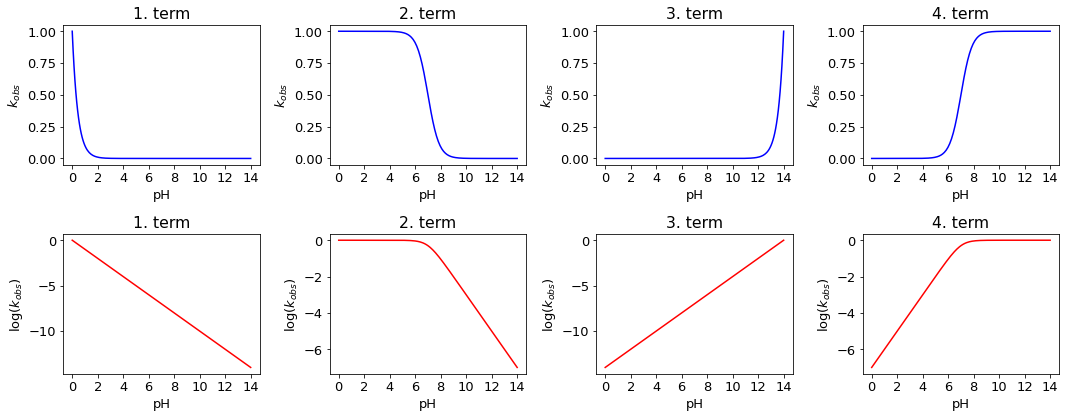

In [8]:
pKa = 7.0
pKw = 14

pH = np.linspace(0, pKw, 200)  # pH linear space from 0 to pKw

# calculate individual terms

k1 = 10 ** (-pH)
k2 = 1 / (1 + 10 ** (pH - pKa))
k3 = 10 ** (pH - pKw)
k4 = 1 / (1 + 10 ** (pKa - pH))

k = [k1, k2, k3, k4]

# calculate decadic logarithms

log_k = [np.log10(_k) for _k in k]

# plot the terms vs pH

plt.rcParams.update({'font.size': 13})

figure, axes = plt.subplots(2, 4, figsize=(15, 6))

for i, (ax, _k) in enumerate(zip(axes[0], k)):
    ax.plot(pH, _k, 'b')
    ax.set_title(f'{i+1}. term')
    ax.set_xlabel("pH")
    ax.set_ylabel("$k_{obs}$")
    ax.xaxis.set_major_locator(MultipleLocator(2))

for i, (ax, _log_k) in enumerate(zip(axes[1], log_k)):
    ax.plot(pH, _log_k, 'r')
    ax.set_title(f'{i+1}. term')
    ax.set_xlabel("pH")
    ax.set_ylabel("log($k_{obs}$)")
    ax.xaxis.set_major_locator(MultipleLocator(2))

plt.tight_layout()
plt.show()